In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb


import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import threading as th
import multiprocessing as mp
import sys
sys.path.append("../src/")
sys.path.append("../py/")
import _functions1 as fn
import _conditions2 as cn
import _plot_fx as pltf
import _param2 as prm
import sim_adj as sm


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [135]:
import importlib
importlib.reload(fn)
importlib.reload(cn)

<module '_conditions2' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_conditions2.py'>

In [111]:
cl = []
cl2 = []
for i in range(1):
	# cens, cens2, qnt_t = fn.sim_3s(
    # qnt_t25, qnt_t75 = fn.sim_3s(
	qnt_t, event_dict, sv_true, x_mat = fn.sim_3s(
		seed= i + 200,
		n = 400,
		scenario = cn.complex_1,
		SPLIT_RULES = prm.SPLIT_RULES1,
		model_dict = prm.MODEL_DICT1,
		sampler_dict = prm.SAMPLER_DICT1 
	)
	# cl.append(cens)
	# cl2.append(cens2)


mean shape 2.0
mean scale 53.01830024456679
229.0
mean time draws 46.24300498714926


In [36]:
import importlib
importlib.reload(fn)

<module '_functions1' from '/Users/jacobtiegs/projects/bart_paper/bart_survival_paper/notebook/../py/_functions1.py'>

In [37]:
x_mat, event_dict, sv_true = fn.sim_3s(
	seed= 200,
	n = 400,
	scenario = cn.complex_1,
	SPLIT_RULES = prm.SPLIT_RULES1,
	model_dict = prm.MODEL_DICT1,
	sampler_dict = prm.SAMPLER_DICT1 
)


mean shape 2.0
mean scale 53.01830024456679
229.0
mean time draws 46.24300498714926


In [27]:
sv1 = pb_sv[0]["sv"].mean(0)
svt = pb_sv[1]

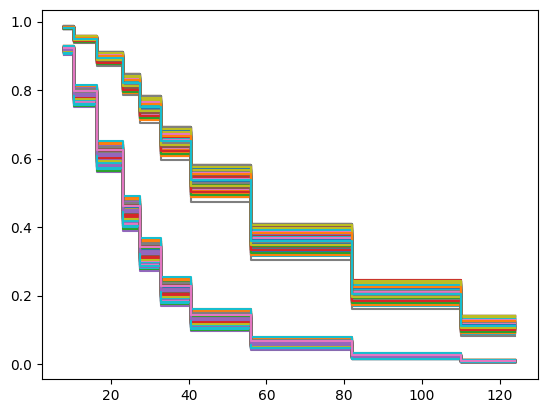

In [32]:
for i in range(400):
    plt.step(svt, sv1[i,:], where="mid")
    

In [33]:
import lifelines as ll

In [57]:
cph = ll.CoxPHFitter()
q = np.hstack([event_dict["t_event"].reshape(-1,1),event_dict["status"].reshape(-1,1),x_mat]) 
col = ["T", "E"] + [f"x_{i}" for i in range(x_mat.shape[1])] 
q = pd.DataFrame(q, columns=col)

cph.fit(q , "T", "E")
cph_sv = cph.predict_survival_function(x_mat).to_numpy().T

In [64]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
x_0,-0.110717,0.895192,0.103976,-0.314506,0.093072,0.730149,1.097540,0.0,-1.064836,2.869502e-01,1.801128
x_1,-0.086056,0.917543,0.103891,-0.289678,0.117567,0.748504,1.124757,0.0,-0.828325,4.074866e-01,1.295176
x_2,0.117568,1.124758,0.104901,-0.088034,0.323169,0.915730,1.381499,0.0,1.120754,2.623926e-01,1.930201
x_3,-0.168970,0.844535,0.104696,-0.374170,0.036231,0.687860,1.036896,0.0,-1.613903,1.065485e-01,3.230418
x_4,-0.155906,0.855640,0.104667,-0.361049,0.049237,0.696945,1.050470,0.0,-1.489544,1.363443e-01,2.874674
x_5,-0.223734,0.799528,0.105000,-0.429531,-0.017937,0.650814,0.982223,0.0,-2.130791,3.310638e-02,4.916747
x_6,-1.945235,0.142954,0.132054,-2.204056,-1.686414,0.110355,0.185182,0.0,-14.730600,4.100472e-49,160.738687
x_7,-0.084169,0.919275,0.104750,-0.289475,0.121136,0.748657,1.128778,0.0,-0.803530,4.216686e-01,1.245818
x_8,0.088907,1.092979,0.103622,-0.114189,0.292003,0.892089,1.339106,0.0,0.857990,3.908980e-01,1.355136


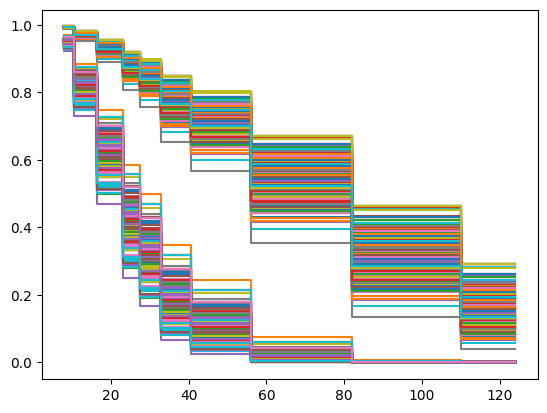

In [60]:
for i in range(400):
    plt.step(svt, cph_sv[i,:], where="mid")

In [132]:
msk = (event_dict["status"]==0).flatten()
sv = sv_true["sv_true"][msk,:]

np.unique(event_dict["t_event"])


array([  8.,  13.,  20.,  26.,  29.,  37.,  44.,  68.,  96., 124.])

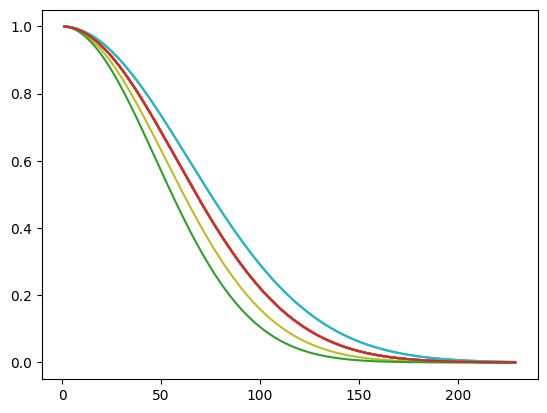

In [129]:
l = np.arange(1,sv.shape[1]+1)
for i in range(sv.shape[0]):
    plt.plot(l, sv[i,:])

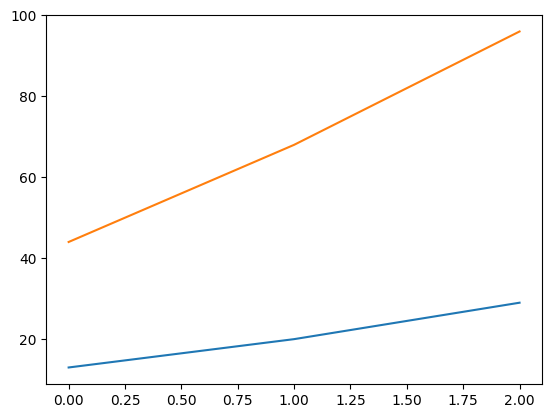

In [81]:
# np.mean(cl)
plt.plot(np.arange(qnt_t25.shape[0]), qnt_t25)
plt.plot(np.arange(qnt_t75.shape[0]), qnt_t75)

In [58]:
qnt_t

array([12, 21, 37, 65, 97])

In [57]:
np.mean(cl2)

0.09849999999999999